# Importing Libraries  (as of now required)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
rwdf = pd.read_csv('redwine.csv')
rwdf.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
rwdf.shape

(1599, 12)

In [4]:
rwdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Obs-:   


There is no null values in the dataset. therefore no requirement of null value operations.

In [5]:
rwdf['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<AxesSubplot:xlabel='quality', ylabel='count'>

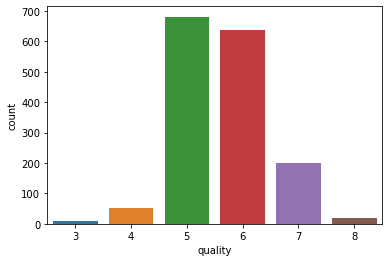

In [6]:
sns.countplot(rwdf['quality'])

# hence this is the classification problem then we have to convert the quality variable to a classification problem in 0 or 1
# because the quality is imbalanced therefore conversion of it is necessary for more better predictions

In [7]:
rwdf['goodquality'] = [1 if x>=6 else 0 for x in rwdf['quality']]

In [8]:
rwdf.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  goodquality  
0      9.4        5            0  
1      9.8        5            0  
2      9.8        5            0  
3      9.8        6            1  
4      9.4        5            0

In [9]:
rwdf = rwdf.drop('quality', axis=1)

In [10]:
rwdf.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  goodquality  
0      9.4            0  
1      9.8            0

In [11]:
rwdf.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol  goodquality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     0.534709  
std       0.154386     0.169507     1.065668     0.498950  
min       2.740000     0.330000     8.400000     0.000000  
25%       3.210000     0.550000     9.500000     0.000000  
50%       3.310000     0.620000    10.200000     1.000000  
75%       3.400000     0.730000    11.100000     1.000000  
max       4.010000     2.000000    14.900000     1.000000

#### Obs-:

we can see that almost all the mean value is greater than its median value.



columns = residual sugar, free sulfur dioxide, total sulfur dioxide have much difference between their 75% and max value, so outlier must be present there.


In [12]:
rwdf.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
goodquality                0.095093         -0.321441     0.159129   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
goodquality                -0.002160  -0.109494            -0.061757   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
goodquality                      -0.231963 -0.159110 -0.003264   0.218072   

                       alcohol  goodquality  
fixed acidity        -0.061668     0.095093  
volatile acidity     -0.202288    -0.321441  
citric acid           0.109903     0.159129  
residual sugar        0.042075    -0.002160  
chlorides            -0.221141    -0.109494  
free sulfur dioxide  -0.069408    -0.061757  
total sulfur dioxide -0.205654    -0.231963  
density              -0.496180    -0.159110  
pH                    0.205633    -0.003264  
sulphates             0.093595     0.218072  
alcohol               1.000000     0.434751  
goodquality           0.434751     1.000000

# Data Visulaisation

<AxesSubplot:>

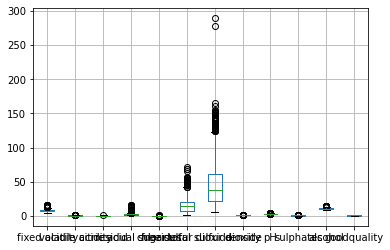

In [13]:
rwdf.boxplot()

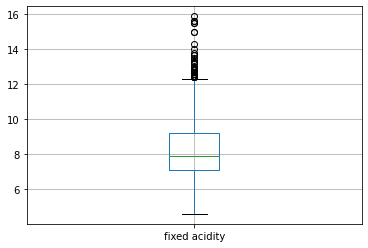

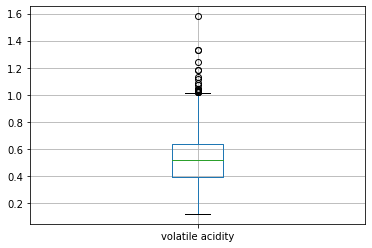

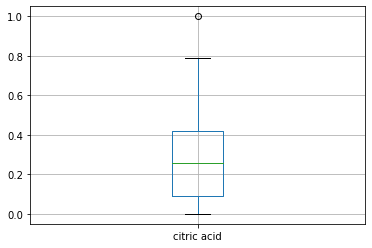

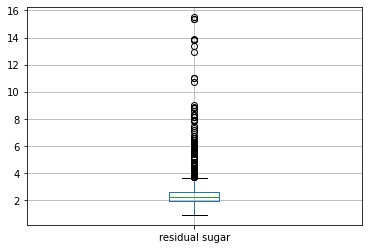

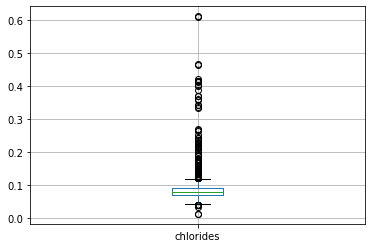

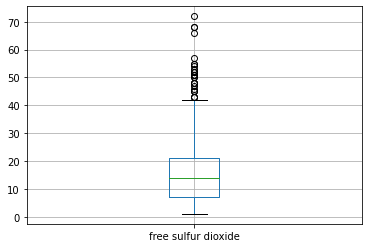

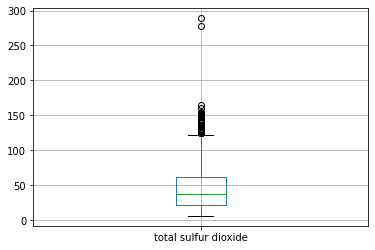

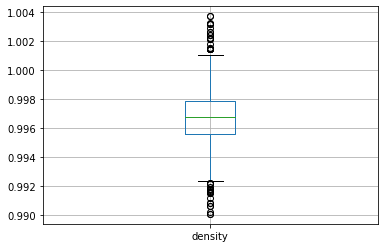

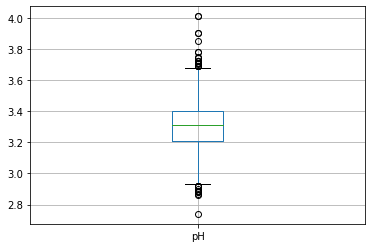

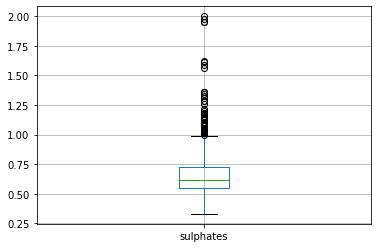

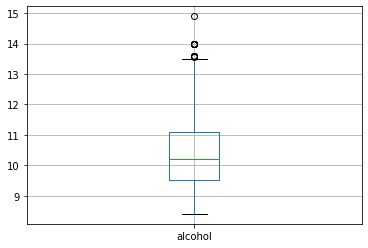

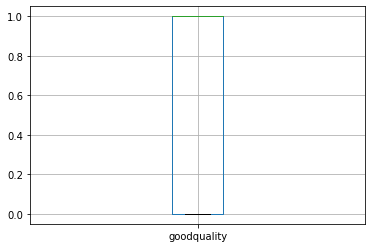

In [14]:
for column in rwdf:
    plt.figure()
    rwdf.boxplot([column])

In [15]:
# Almost all the columns have some outliers in it

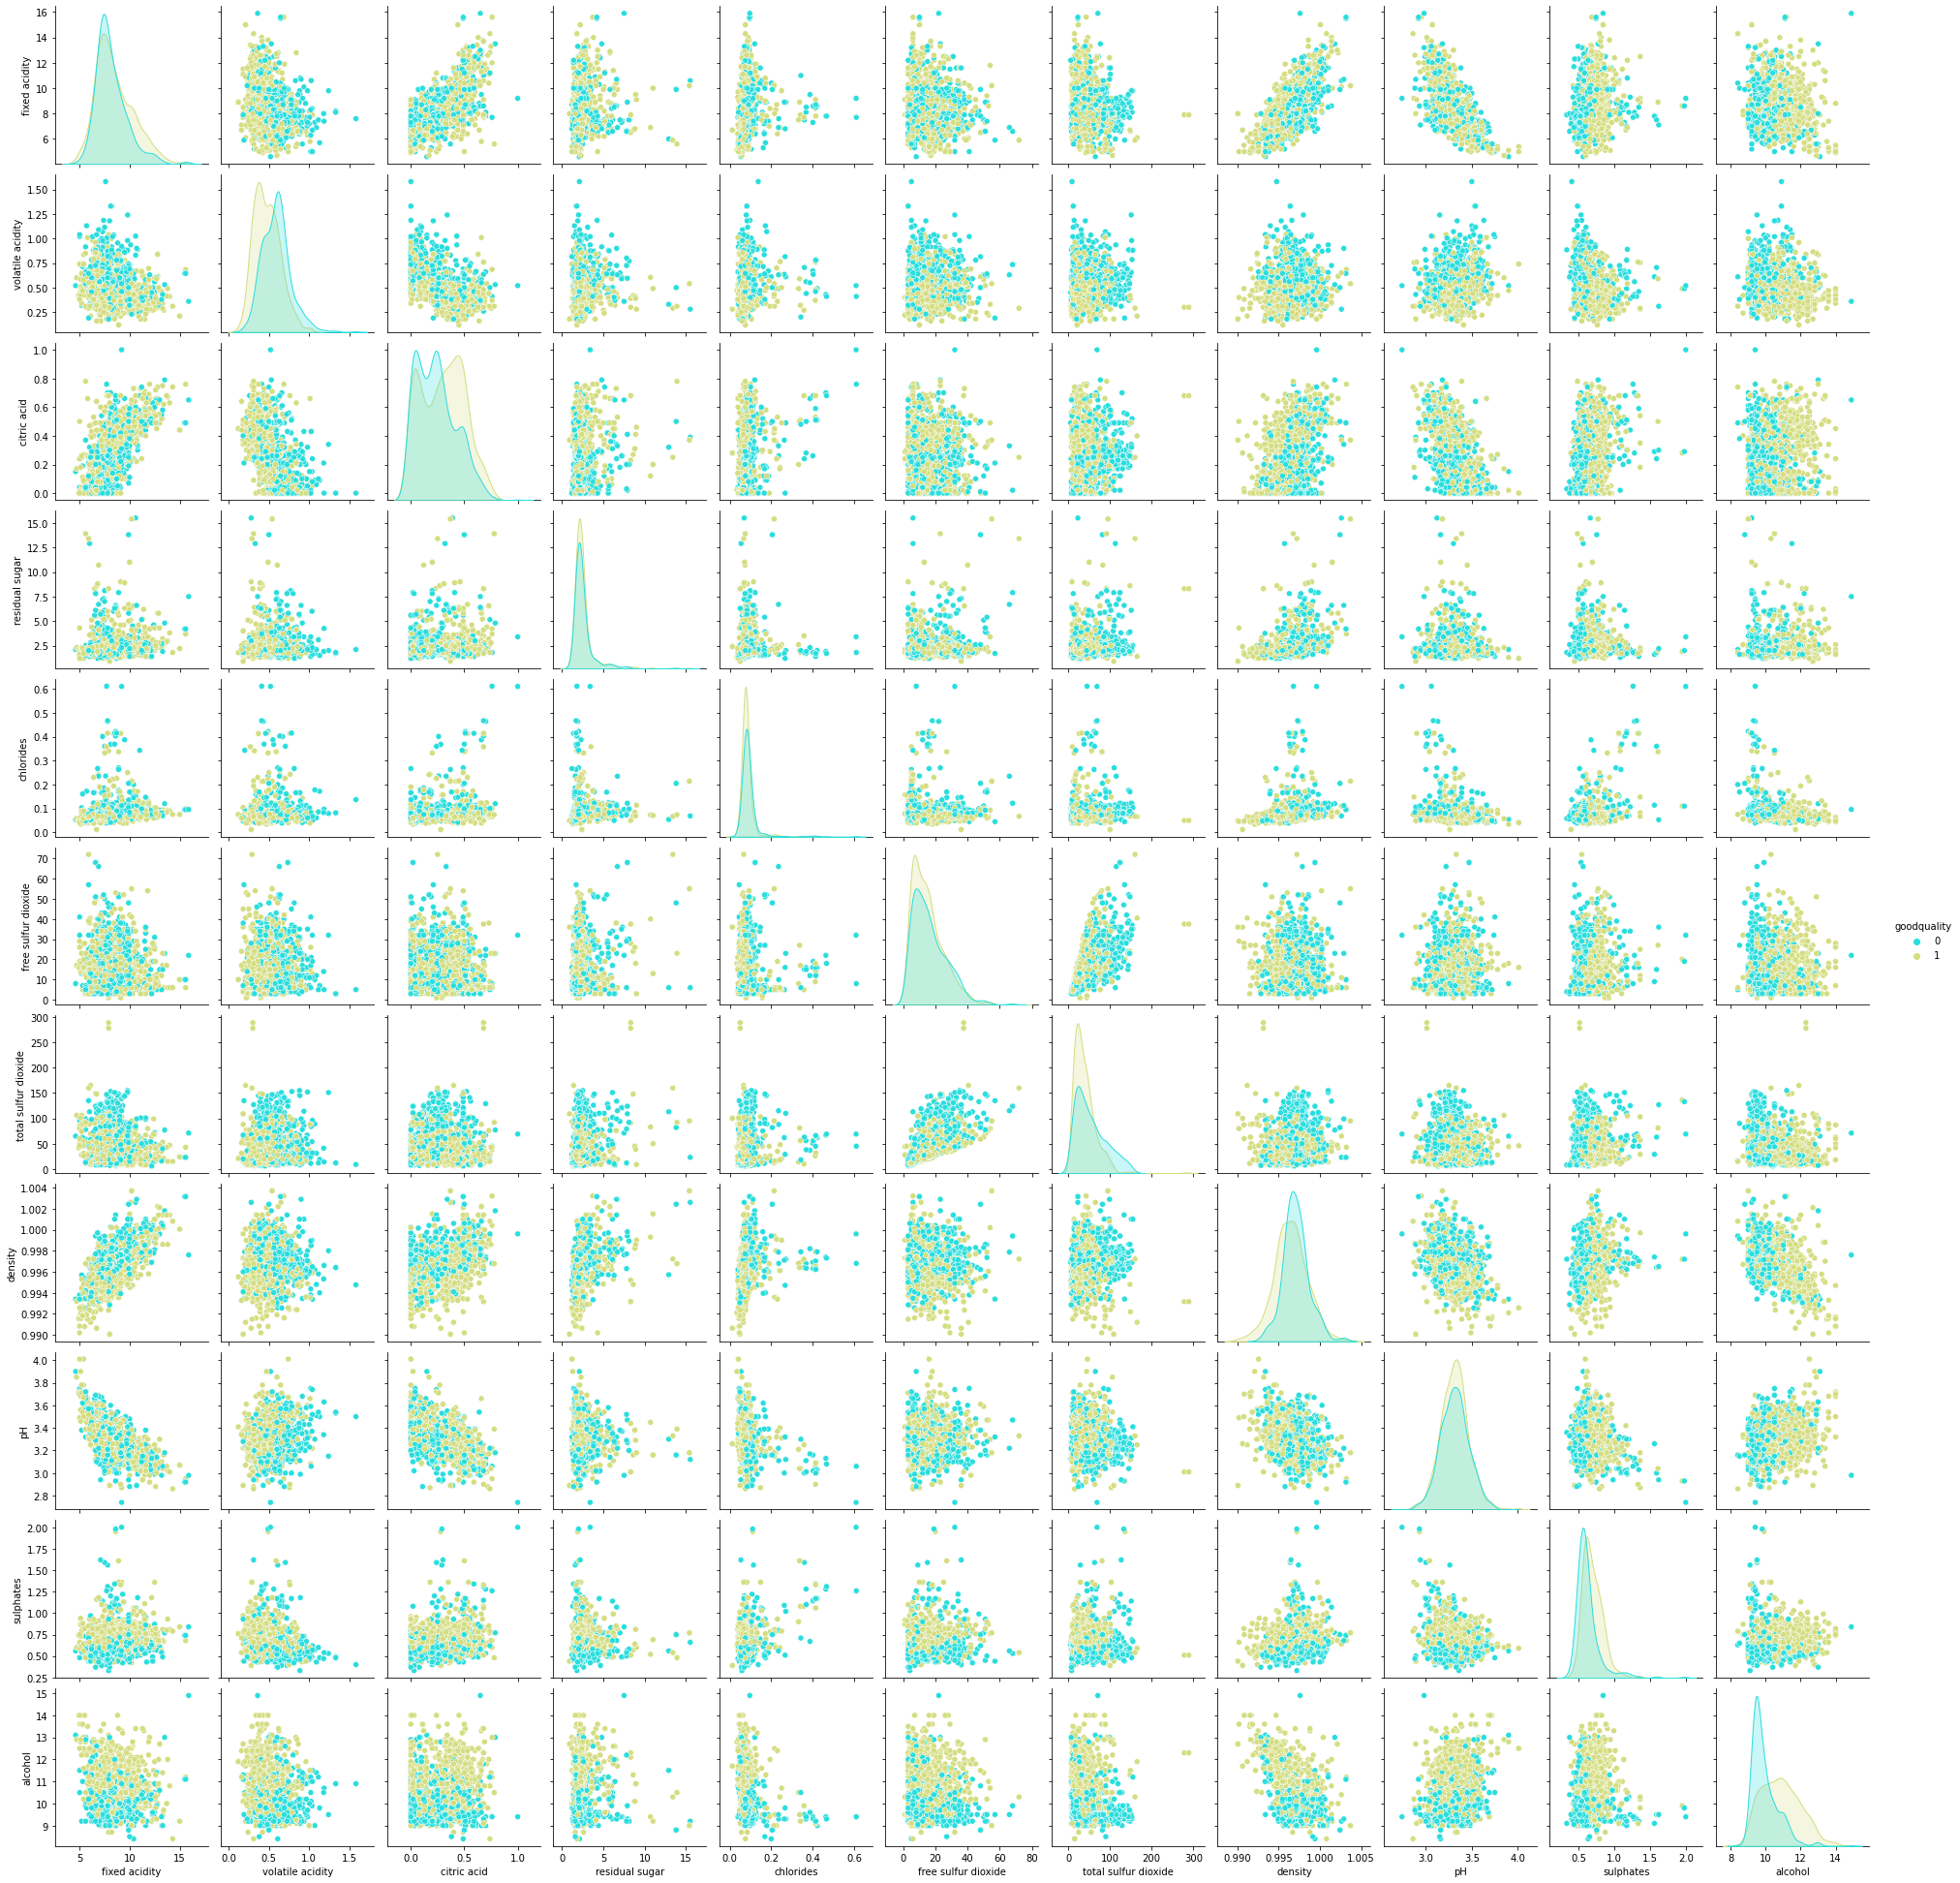

In [18]:
sns.pairplot(rwdf, hue = 'goodquality', palette = 'rainbow')

#### we can actually see that the major of the values of the variable gives us the quality of 5-6
#### our most of the columns have skewed data in it.

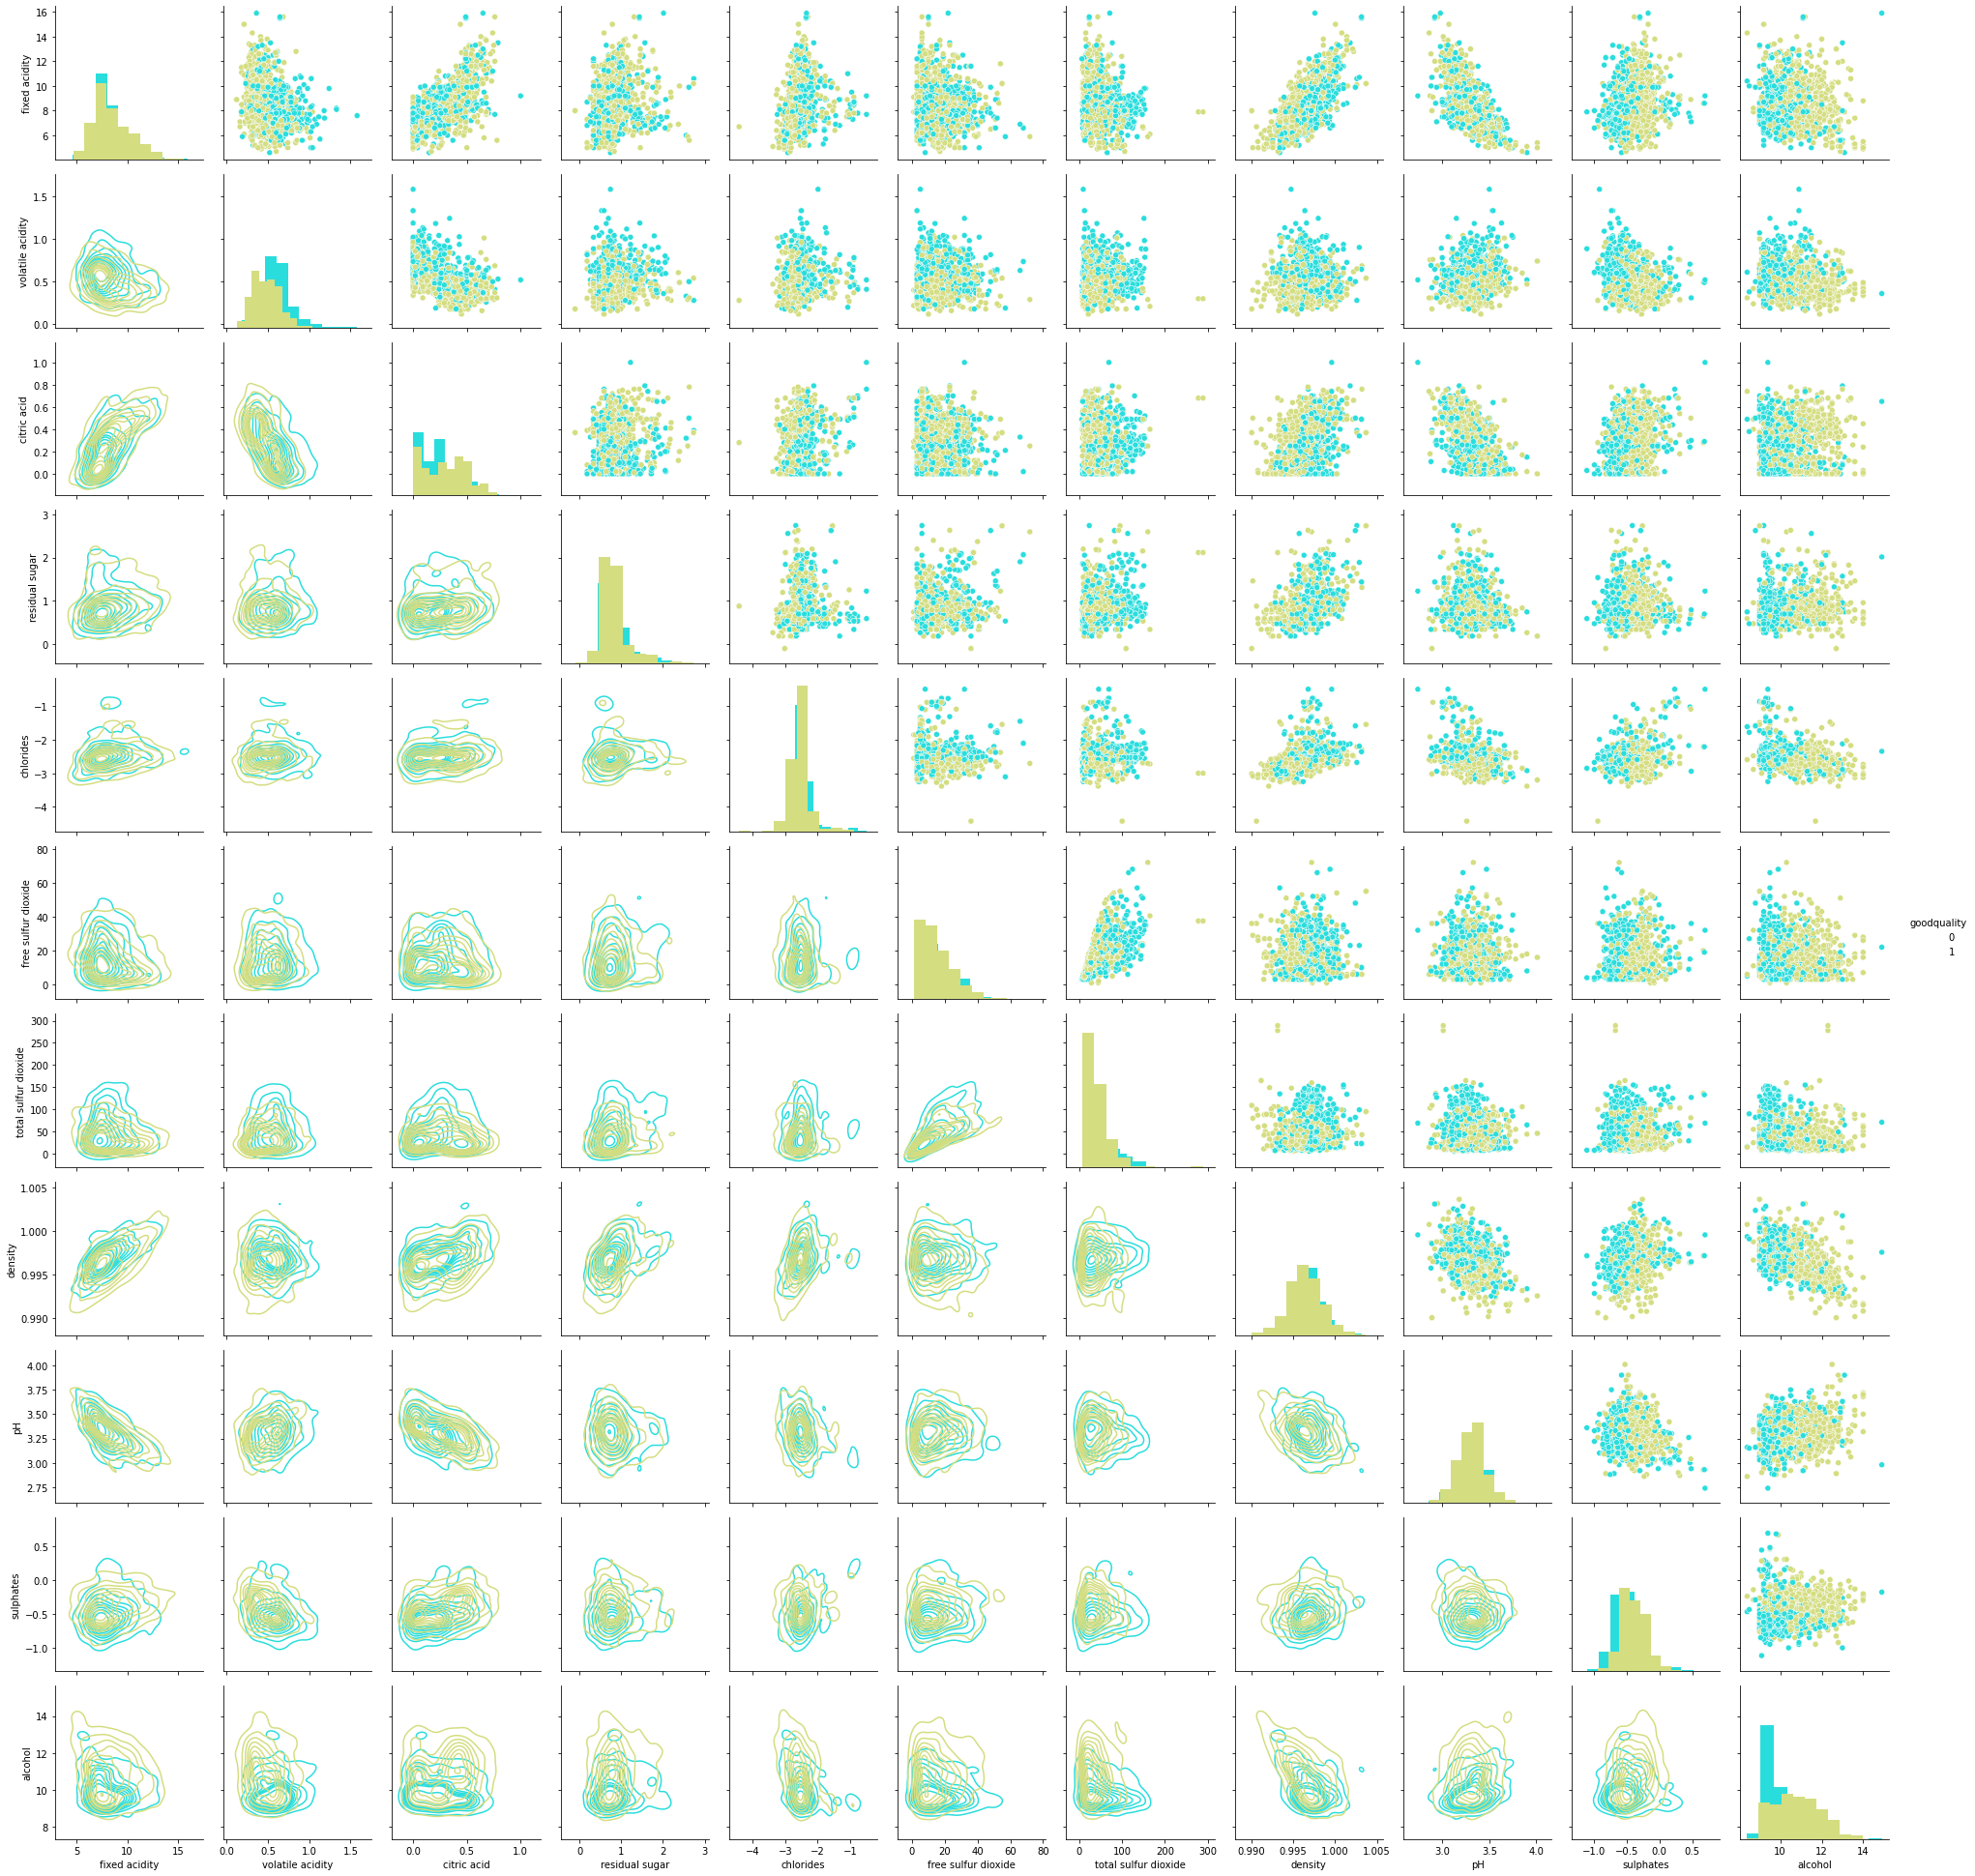

In [42]:
g = sns.PairGrid(rwdf, hue = 'goodquality', palette = 'rainbow')
g.map_diag(plt.hist)
g.add_legend()
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

In [26]:
rwdf.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
goodquality            -0.139303
dtype: float64

In [27]:
residual_sugar_log = np.log(rwdf['residual sugar'])
chlorides_log = np.log(rwdf['chlorides'])
sulphates_log = np.log(rwdf['sulphates'])

In [39]:
rwdf['residual sugar'] = residual_sugar_log
rwdf['chlorides'] = chlorides_log
rwdf['sulphates'] = sulphates_log

In [40]:
rwdf.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00        0.641854  -2.577022   
1            7.8              0.88         0.00        0.955511  -2.322788   
2            7.8              0.76         0.04        0.832909  -2.385967   
3           11.2              0.28         0.56        0.641854  -2.590267   
4            7.4              0.70         0.00        0.641854  -2.577022   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51  -0.579818   
1                 25.0                  67.0   0.9968  3.20  -0.385662   
2                 15.0                  54.0   0.9970  3.26  -0.430783   
3                 17.0                  60.0   0.9980  3.16  -0.544727   
4                 11.0                  34.0   0.9978  3.51  -0.579818   

   alcohol  goodquality  
0      9.4            0  
1      9.8            0  
2      9.8            0  
3      9.8            1  
4      9.4            0

In [41]:
rwdf.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          1.806864
chlorides               1.745215
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               0.921867
alcohol                 0.860829
goodquality            -0.139303
dtype: float64

skewness has been treated upto some extent

<AxesSubplot:>

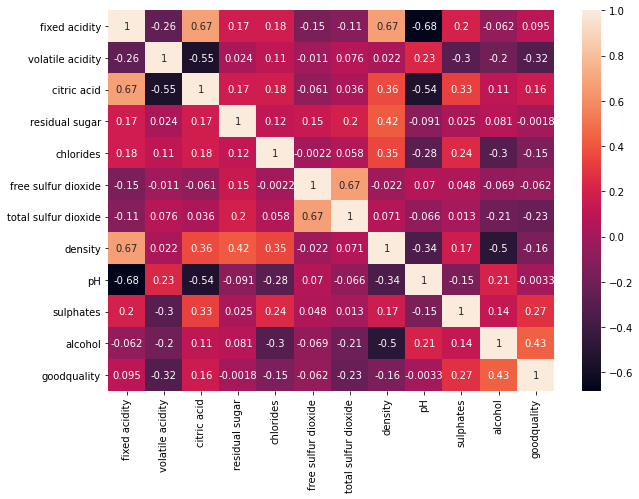

In [43]:
plt.figure(figsize = (10,7) )
sns.heatmap(rwdf.corr(), annot = True)

In [44]:
d = [0.48,-0.39]
c = ['alcohol', 'volatile acidity']
i = ['goodquality']
df = pd.DataFrame(data =d,
                 index = c,
                  columns = i)
df

goodquality
alcohol                  0.48
volatile acidity        -0.39

the quality (out target variable) has most positive and most negative corr() with these two 

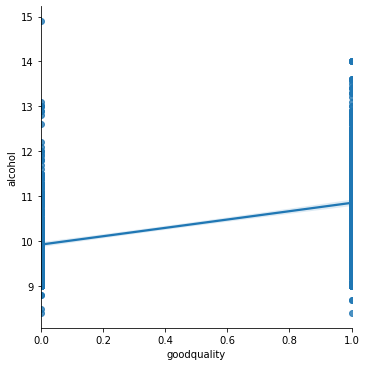

In [45]:
sns.lmplot(x='goodquality',y='alcohol',data= rwdf)

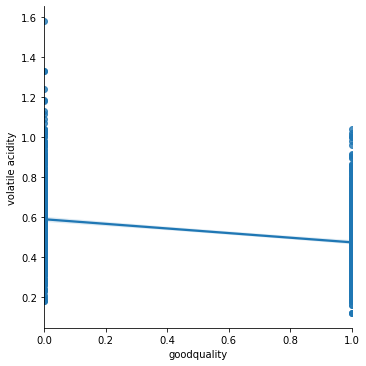

In [46]:
sns.lmplot(x='goodquality',y='volatile acidity',data = rwdf)

# Removing outliers

#### --> We can see that the volatile acidity is showing very negative correlation on every variable and therefore its decresing the quality of wine.
#### --> Hence we drop this column.

In [47]:
rwdf = rwdf.drop('volatile acidity', axis =1 )

In [48]:
rwdf.shape

(1599, 11)

volatile acidity column reduced

In [49]:
from scipy.stats import zscore
z = np.abs(zscore(rwdf))
z

array([[0.52835961, 1.39147228, 0.5831499 , ..., 0.60206208, 0.96024611,
        1.07200445],
       [0.29854743, 1.39147228, 0.29462737, ..., 0.26665831, 0.58477711,
        1.07200445],
       [0.29854743, 1.18607043, 0.0484778 , ..., 0.06477406, 0.58477711,
        1.07200445],
       ...,
       [1.1603431 , 0.72391627, 0.0484778 , ..., 0.70505615, 0.54162988,
        0.93283195],
       [1.39015528, 0.77526673, 0.43960453, ..., 0.45982537, 0.20930812,
        1.07200445],
       [1.33270223, 1.02199944, 1.2053288 , ..., 0.13308595, 0.54162988,
        0.93283195]])

In [50]:
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   42,   45,   57,
         81,   81,   83,   86,   91,   92,   95,  106,  106,  109,  142,
        144,  147,  151,  151,  151,  151,  163,  164,  169,  169,  181,
        226,  226,  240,  243,  244,  258,  258,  274,  281,  291,  324,
        325,  339,  347,  354,  374,  381,  391,  396,  396,  400,  400,
        442,  442,  451,  467,  480,  480,  494,  515,  544,  554,  554,
        555,  555,  557,  557,  566,  567,  568,  584,  588,  591,  595,
        608,  614,  636,  639,  649,  649,  651,  652,  652,  652,  666,
        672,  684,  692,  695,  723,  730,  754,  776,  777,  821,  836,
        836,  837,  837,  889,  911,  917,  923,  925,  926,  982, 1017,
       1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111,
       1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244,
       1260, 1269, 1269, 1270, 1270, 1295, 1296, 1300, 1316, 1319, 1319,
       1321, 1358, 1370, 1372, 1374, 1434, 1434, 1

In [51]:
z[13][8]

3.9819204885091475

In [52]:
z[1589][2]

3.369116947181566

In [53]:
rw_new = rwdf[(z<3).all(axis=1)]

In [54]:
rw_new

fixed acidity  citric acid  residual sugar  chlorides  \
0               7.4         0.00        0.641854  -2.577022   
1               7.8         0.00        0.955511  -2.322788   
2               7.8         0.04        0.832909  -2.385967   
3              11.2         0.56        0.641854  -2.590267   
4               7.4         0.00        0.641854  -2.577022   
...             ...          ...             ...        ...   
1594            6.2         0.08        0.693147  -2.407946   
1595            5.9         0.10        0.788457  -2.780621   
1596            6.3         0.13        0.832909  -2.577022   
1597            5.9         0.12        0.693147  -2.590267   
1598            6.0         0.47        1.280934  -2.703063   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51  -0.579818   
1                    25.0                  67.0  0.99680  3.20  -0.385662   
2                    15.0                  54.0  0.99700  3.26  -0.430783   
3                    17.0                  60.0  0.99800  3.16  -0.544727   
4                    11.0                  34.0  0.99780  3.51  -0.579818   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45  -0.544727   
1595                 39.0                  51.0  0.99512  3.52  -0.274437   
1596                 29.0                  40.0  0.99574  3.42  -0.287682   
1597                 32.0                  44.0  0.99547  3.57  -0.342490   
1598                 18.0                  42.0  0.99549  3.39  -0.415515   

      alcohol  goodquality  
0         9.4            0  
1         9.8            0  
2         9.8            0  
3         9.8            1  
4         9.4            0  
...       ...          ...  
1594     10.5            0  
1595     11.2            1  
1596     11.0            1  
1597     10.2            0  
1598     11.0            1  

[1471 rows x 11 columns]

## Masking outliers 

if any were present after removing

<AxesSubplot:>

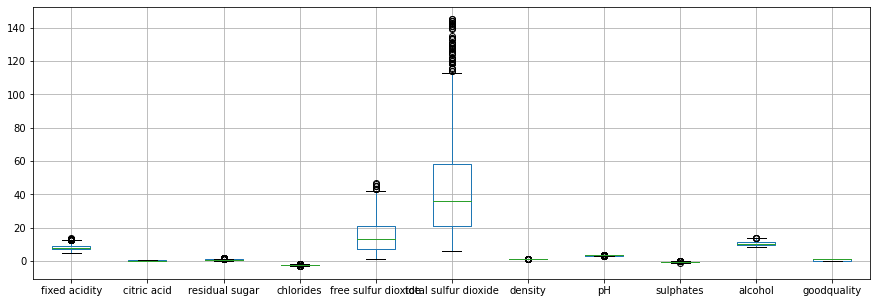

In [55]:
plt.figure(figsize= (15,5))
rw_new.boxplot()

In [56]:
# Defining x for masking the variables data (if any outliers present in it which may affect the result quality of our model)


x = rw_new.iloc[:,0:-1]
x.shape

(1471, 10)

In [57]:
from scipy.stats.mstats import winsorize
# 1% of the lowest value and 15% of the highest value are replace
xarr = x.to_numpy()
x_mskd = winsorize(xarr, limits = [0.01, 0.15])
x_mskd

masked_array(
  data=[[ 7.4       ,  0.        ,  0.64185389, ...,  3.51      ,
         -0.5798185 ,  9.4       ],
        [ 7.8       ,  0.        ,  0.95551145, ...,  3.2       ,
         -0.38566248,  9.8       ],
        [ 7.8       ,  0.04      ,  0.83290912, ...,  3.26      ,
         -0.43078292,  9.8       ],
        ...,
        [ 6.3       ,  0.13      ,  0.83290912, ...,  3.42      ,
         -0.28768207, 11.        ],
        [ 5.9       ,  0.12      ,  0.69314718, ...,  3.57      ,
         -0.34249031, 10.2       ],
        [ 6.        ,  0.47      ,  1.28093385, ...,  3.39      ,
         -0.41551544, 11.        ]],
  mask=False,
  fill_value=1e+20)

In [58]:
c =x.columns
c

Index(['fixed acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [59]:
x_mskd = pd.DataFrame(data = x_mskd, columns = c)
x_mskd

fixed acidity  citric acid  residual sugar  chlorides  \
0               7.4         0.00        0.641854  -2.577022   
1               7.8         0.00        0.955511  -2.322788   
2               7.8         0.04        0.832909  -2.385967   
3              11.2         0.56        0.641854  -2.590267   
4               7.4         0.00        0.641854  -2.577022   
...             ...          ...             ...        ...   
1466            6.2         0.08        0.693147  -2.407946   
1467            5.9         0.10        0.788457  -2.780621   
1468            6.3         0.13        0.832909  -2.577022   
1469            5.9         0.12        0.693147  -2.590267   
1470            6.0         0.47        1.280934  -2.703063   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  12.5  0.99780  3.51  -0.579818   
1                    12.5                  12.5  0.99680  3.20  -0.385662   
2                    12.5                  12.5  0.99700  3.26  -0.430783   
3                    12.5                  12.5  0.99800  3.16  -0.544727   
4                    11.0                  12.5  0.99780  3.51  -0.579818   
...                   ...                   ...      ...   ...        ...   
1466                 12.5                  12.5  0.99490  3.45  -0.544727   
1467                 12.5                  12.5  0.99512  3.52  -0.274437   
1468                 12.5                  12.5  0.99574  3.42  -0.287682   
1469                 12.5                  12.5  0.99547  3.57  -0.342490   
1470                 12.5                  12.5  0.99549  3.39  -0.415515   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1466     10.5  
1467     11.2  
1468     11.0  
1469     10.2  
1470     11.0  

[1471 rows x 10 columns]

## now we have two variable df (x and x_mskd)
## we will check with both that how they are affecting our model.

In [60]:
y = rw_new.iloc[:,10:]
y

goodquality
0               0
1               0
2               0
3               1
4               0
...           ...
1594            0
1595            1
1596            1
1597            0
1598            1

[1471 rows x 1 columns]

In [61]:
x.head()

fixed acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  \
0            7.4         0.00        0.641854  -2.577022                 11.0   
1            7.8         0.00        0.955511  -2.322788                 25.0   
2            7.8         0.04        0.832909  -2.385967                 15.0   
3           11.2         0.56        0.641854  -2.590267                 17.0   
4            7.4         0.00        0.641854  -2.577022                 11.0   

   total sulfur dioxide  density    pH  sulphates  alcohol  
0                  34.0   0.9978  3.51  -0.579818      9.4  
1                  67.0   0.9968  3.20  -0.385662      9.8  
2                  54.0   0.9970  3.26  -0.430783      9.8  
3                  60.0   0.9980  3.16  -0.544727      9.8  
4                  34.0   0.9978  3.51  -0.579818      9.4

In [62]:
x_mskd.head()

fixed acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  \
0            7.4         0.00        0.641854  -2.577022                 11.0   
1            7.8         0.00        0.955511  -2.322788                 12.5   
2            7.8         0.04        0.832909  -2.385967                 12.5   
3           11.2         0.56        0.641854  -2.590267                 12.5   
4            7.4         0.00        0.641854  -2.577022                 11.0   

   total sulfur dioxide  density    pH  sulphates  alcohol  
0                  12.5   0.9978  3.51  -0.579818      9.4  
1                  12.5   0.9968  3.20  -0.385662      9.8  
2                  12.5   0.9970  3.26  -0.430783      9.8  
3                  12.5   0.9980  3.16  -0.544727      9.8  
4                  12.5   0.9978  3.51  -0.579818      9.4

# Model building

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .33, random_state=0)
x_train2, x_test2,y_train2, y_test2 = train_test_split(x_mskd, y, test_size = .33, random_state = 0)

In [64]:
lst = [x_train, x_test, y_train, y_test, x_train2, x_test2,y_train2, y_test2]
for i in lst:
    print(i.shape)

(985, 10)
(486, 10)
(985, 1)
(486, 1)
(985, 10)
(486, 10)
(985, 1)
(486, 1)


In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
gnb = GaussianNB()
gnb.fit(x_train,y_train)
print(gnb.score(x_train,y_train))
print('\n')
predgnb = gnb.predict(x_test)

print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test, predgnb))

0.7390862944162436


0.7057613168724279
[[171  71]
 [ 72 172]]
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       242
           1       0.71      0.70      0.71       244

    accuracy                           0.71       486
   macro avg       0.71      0.71      0.71       486
weighted avg       0.71      0.71      0.71       486



In [69]:
# model with masked data
gnb2 = GaussianNB()
gnb2.fit(x_train2,y_train2)
print(gnb2.score(x_train2,y_train2))
print('\n')
predgnb2 = gnb2.predict(x_test2)

print(accuracy_score(y_test2,predgnb2))
print(confusion_matrix(y_test2, predgnb2))
print(classification_report(y_test2, predgnb2))

0.7086294416243655


0.7037037037037037
[[184  58]
 [ 86 158]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       242
           1       0.73      0.65      0.69       244

    accuracy                           0.70       486
   macro avg       0.71      0.70      0.70       486
weighted avg       0.71      0.70      0.70       486



In [70]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print(dtc.score(x_train, y_train))
print('\n')
preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

1.0


0.7325102880658436
[[172  70]
 [ 60 184]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       242
           1       0.72      0.75      0.74       244

    accuracy                           0.73       486
   macro avg       0.73      0.73      0.73       486
weighted avg       0.73      0.73      0.73       486



In [71]:
# model with masked data
dtc2 = DecisionTreeClassifier()
dtc2.fit(x_train2, y_train2)
print(dtc2.score(x_train2, y_train2))
print('\n')
preddtc2 = dtc2.predict(x_test2)

print(accuracy_score(y_test2, preddtc2))
print(confusion_matrix(y_test2, preddtc2))
print(classification_report(y_test2, preddtc2))

1.0


0.7448559670781894
[[174  68]
 [ 56 188]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       242
           1       0.73      0.77      0.75       244

    accuracy                           0.74       486
   macro avg       0.75      0.74      0.74       486
weighted avg       0.75      0.74      0.74       486



 our masked data has reduced some errors in decision tree

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print(knn.score(x_train, y_train))
predknn = knn.predict(x_test)

print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test, predknn))

0.7695431472081218
0.602880658436214
[[128 114]
 [ 79 165]]
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       242
           1       0.59      0.68      0.63       244

    accuracy                           0.60       486
   macro avg       0.60      0.60      0.60       486
weighted avg       0.60      0.60      0.60       486



In [76]:
# model with masked data
dtc3 = DecisionTreeClassifier(random_state = 1)
dtc3.fit(x_train2, y_train2)
print(dtc3.score(x_train2, y_train2))
print('\n')
preddtc3 = dtc3.predict(x_test2)

print(accuracy_score(y_test2, preddtc3))
print(confusion_matrix(y_test2, preddtc3))
print(classification_report(y_test2, preddtc3))

1.0


0.7386831275720165
[[177  65]
 [ 62 182]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       242
           1       0.74      0.75      0.74       244

    accuracy                           0.74       486
   macro avg       0.74      0.74      0.74       486
weighted avg       0.74      0.74      0.74       486



In [108]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(random_state=1)
ad.fit(x_train, y_train)
predad= ad.predict(x_test)
print(confusion_matrix(y_test,predad))
print(classification_report(y_test, predad))

[[180  62]
 [ 65 179]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       242
           1       0.74      0.73      0.74       244

    accuracy                           0.74       486
   macro avg       0.74      0.74      0.74       486
weighted avg       0.74      0.74      0.74       486



In [109]:
ad2 = AdaBoostClassifier(random_state=1)
ad2.fit(x_train2, y_train2)
predad2= ad2.predict(x_test2)
print(classification_report(y_test2, predad2))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       242
           1       0.71      0.70      0.71       244

    accuracy                           0.71       486
   macro avg       0.71      0.71      0.71       486
weighted avg       0.71      0.71      0.71       486



In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(x_train, y_train)
predgbc = gbc.predict(x_test)
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test, predgbc))

[[180  62]
 [ 56 188]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       242
           1       0.75      0.77      0.76       244

    accuracy                           0.76       486
   macro avg       0.76      0.76      0.76       486
weighted avg       0.76      0.76      0.76       486



In [81]:
gbc2 = GradientBoostingClassifier(random_state=1)
gbc2.fit(x_train2, y_train2)
predgbc2 = gbc2.predict(x_test2)
print(classification_report(y_test2, predgbc2))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       242
           1       0.76      0.74      0.75       244

    accuracy                           0.75       486
   macro avg       0.75      0.75      0.75       486
weighted avg       0.75      0.75      0.75       486



In [104]:
import xgboost as xgb
xgb = xgb.XGBClassifier(random_state=1)
xgb.fit(x_train, y_train)
predxgb = xgb.predict(x_test)
print(confusion_matrix(y_test,predxgb))
print(classification_report(y_test, predxgb))

[[187  55]
 [ 58 186]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       242
           1       0.77      0.76      0.77       244

    accuracy                           0.77       486
   macro avg       0.77      0.77      0.77       486
weighted avg       0.77      0.77      0.77       486



In [105]:
import xgboost as xgb
xgb2 = xgb.XGBClassifier(random_state=1)
xgb2.fit(x_train2, y_train2)
predxgb2 = xgb2.predict(x_test2)
print(confusion_matrix(y_test2,predxgb2))
print(classification_report(y_test2, predxgb2))

[[187  55]
 [ 62 182]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       242
           1       0.77      0.75      0.76       244

    accuracy                           0.76       486
   macro avg       0.76      0.76      0.76       486
weighted avg       0.76      0.76      0.76       486



In [90]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.66      0.29      0.41       242
           1       0.55      0.85      0.67       244

    accuracy                           0.57       486
   macro avg       0.61      0.57      0.54       486
weighted avg       0.61      0.57      0.54       486



In [102]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

[[187  55]
 [ 49 195]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       242
           1       0.78      0.80      0.79       244

    accuracy                           0.79       486
   macro avg       0.79      0.79      0.79       486
weighted avg       0.79      0.79      0.79       486



we gonna check different parameter setting for rfc, xgb, gbc, dtc

In [92]:
from sklearn.model_selection import cross_val_score 

In [99]:
model = [rfc,xgb.XGBClassifier(),gbc,dtc,ad]
for m in model:
    cv = cross_val_score(m,x,y,cv=5)
    print(cv)
    print(f'cross-validation mean value for {m}:',round (cv.mean(),3))
    print('cross-validation std is:', cv.std())
    print('\n')

[0.63050847 0.70408163 0.77891156 0.71428571 0.72789116]
cross-validation mean value for RandomForestClassifier(): 0.711
cross-validation std is: 0.04782205575404498


[0.65423729 0.72108844 0.76870748 0.73129252 0.72108844]
cross-validation mean value for XGBClassifier(): 0.719
cross-validation std is: 0.03694447683610616


[0.66101695 0.71768707 0.75510204 0.73129252 0.72108844]
cross-validation mean value for GradientBoostingClassifier(random_state=1): 0.717
cross-validation std is: 0.03100660933614412


[0.61694915 0.65986395 0.69727891 0.6462585  0.67687075]
cross-validation mean value for DecisionTreeClassifier(): 0.659
cross-validation std is: 0.027258091732038338


[0.65084746 0.65306122 0.7585034  0.73809524 0.71088435]
cross-validation mean value for AdaBoostClassifier(random_state=1): 0.702
cross-validation std is: 0.04378500041675979




# -------------------- Grid Search CV ---------------------------

In [101]:
from sklearn.model_selection import GridSearchCV

grid_param = {'criterion' : ['gini','entropy'], 'max_depth' : [1,2,3,4,5,6,7,8,9,10]}
              
gd_sr = GridSearchCV (estimator=dtc, param_grid = grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'gini', 'max_depth': 10}
0.7157360406091371


In [111]:
params = {'n_estimators':[100,300,500,700],'criterion': ['friedman_mse', 'mse', 'mae'], 'max_depth': [3,4,5,6,7,8,9,10]}
gcv = GridSearchCV(estimator=gbc, param_grid= params, scoring= 'accuracy', cv =5)
gcv.fit(x_train,y_train)

best_parameters = gcv.best_params_
print(best_parameters)
best_result = gcv.best_score_
print(best_result)

{'criterion': 'friedman_mse', 'max_depth': 9, 'n_estimators': 500}
0.7888324873096447


In [113]:
grid_param = {'n_estimators':[100,500],'criterion' : ['gini','entropy'], 'max_depth' : [6,7,8,9,10]}
              
gd_sr = GridSearchCV (estimator=rfc, param_grid = grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 500}
0.7928934010152284


## so the best model is rfc with the above parameters giving 0.79 the best score

In [116]:
rfc2 = RandomForestClassifier(n_estimators=500 ,criterion= 'entropy', max_depth= 10)
rfc2.fit(x_train,y_train)
pred_rfc2 = rfc.predict(x_test)
print(confusion_matrix(y_test,pred_rfc2))
print(classification_report(y_test,pred_rfc2))

[[187  55]
 [ 49 195]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       242
           1       0.78      0.80      0.79       244

    accuracy                           0.79       486
   macro avg       0.79      0.79      0.79       486
weighted avg       0.79      0.79      0.79       486



In [119]:
cv = cross_val_score(rfc2,x,y,cv=5)
print(cv)
print('cross-validation mean value is:',round (cv.mean(),3))

[0.68135593 0.71088435 0.78231293 0.7244898  0.71428571]
cross-validation mean value is: 0.723


# AUC-ROC Curve

In [115]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [120]:
y_pred_prob = rfc2.predict_proba(x_test)[:,1]

In [121]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

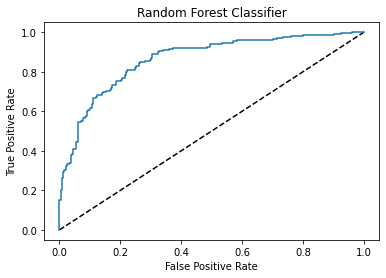

In [122]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [123]:
auc_score = roc_auc_score(y_test,rfc2.predict(x_test))
print(auc_score)

0.7757587047825498


In [124]:
# Saving the best Model

In [125]:
import joblib
joblib.dump(rfc2,'rfc2file.obj')

['rfc2file.obj']